In [6]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [7]:
# importing dataset
data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [35]:
# Thompson Sampling
no_users = data.shape[0]
no_ads = data.shape[1]
number_of_rewards_1 = [0] * no_ads
number_of_rewards_0 = [0] * no_ads
ads_selected = []
total_reward = 0

In [36]:
for user_n in range(no_users):
    max_random = 0
    selected_ad = 0
    for ad in range(no_ads):
        random_beta = random.betavariate(number_of_rewards_1[ad]+1, number_of_rewards_0[ad]+1)
        if random_beta > max_random:
            max_random = random_beta
            selected_ad = ad
    reward = data.values[user_n, selected_ad]
    if reward == 1:
        number_of_rewards_1[selected_ad] += 1
    else:
        number_of_rewards_0[selected_ad] += 1
    ads_selected.append(selected_ad)
    total_reward = sum(number_of_rewards_1)

In [37]:
print(total_reward)

2610


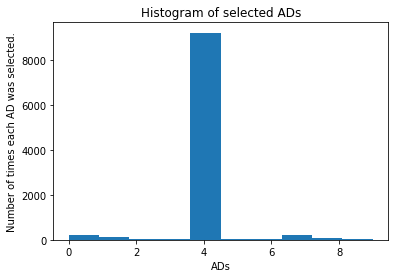

In [38]:
# Visualizing the results
plt.hist(ads_selected)
plt.title('Histogram of selected ADs')
plt.xlabel('ADs')
plt.ylabel('Number of times each AD was selected.')
plt.show()